# Conciencia Situacional en Sistemas Autonomos. Aplicaciones y Casos de uso sector Defensa

## Inferencia Activa en Agentes BDI

### Introducción

El propósito de este PoC, en el contexto de un escenario bélico, es validar la capacidad de un agente autónomo para ejecutar una misión táctica específica: **la interceptación de un objeto móvil**. La AIF, a través de la arquitectura BDI, proporciona el marco para que este agente no solo reaccione a los estímulos, sino que también razone sobre ellos. La misión de un UAV, como el agente de nuestro PoC, en un entorno de defensa, podría ser la interceptación de un misil de crucero, un dron hostil o incluso un avión de baja velocidad. El PoC demuestra que, con información limitada (la posición del objetivo), un agente BDI puede desarrollar un entendimiento del entorno (sus creencias), establecer un objetivo (sus deseos) y ejecutar un plan para alcanzarlo (sus intenciones).

---

### Marco Teórico: AIF para la Conciencia Situacional en Escenarios Bélicos

La AIF es un pilar fundamental para lograr una conciencia situacional sólida en un campo de batalla moderno. No se trata solo de la fusión de datos de sensores, sino de la fusión de información a un nivel más profundo. El modelo BDI encapsula esta idea:

1.  **Fusión de Datos a Nivel de Creencias:** En un entorno de combate, un agente no tiene una única fuente de información perfecta. Los datos pueden provenir de múltiples sensores (radar, infrarrojos, visuales), cada uno con diferentes niveles de precisión y confiabilidad. La etapa de **Creencias** en el PoC simula esta fusión al actualizar el estado del agente con las "observaciones" del objetivo. En un escenario real, las creencias se formarían a partir de un **fusión de datos multisensorial**, combinando la información de un radar a bordo, el enlace de datos de un puesto de mando terrestre y la confirmación visual, cada uno con un peso de confianza diferente.
2.  **Deseos como Objetivos de Misión:** En la arquitectura BDI, los **Deseos** no son caprichos, sino metas de misión. En el PoC, los deseos son simples ("interceptar" y "seguir"), pero en un contexto bélico, podrían ser más complejos y jerárquicos: "priorizar la intercepción de misiles de mayor velocidad" sobre "rastrear aviones de transporte", o "evitar zonas con defensa antiaérea". El agente evalúa la utilidad de cada deseo en función de las creencias actuales y la importancia de la misión.
3.  **Intenciones como Planes de Batalla:** Las **Intenciones** representan los planes tácticos del agente. El PoC demuestra la capacidad de replanificación del agente cuando el objetivo se mueve de manera impredecible. En un escenario de combate real, esto sería crucial. Si un objetivo evasivo cambia de rumbo, el agente no se aferra a un plan obsoleto, sino que ajusta su intención de vuelo para reflejar la nueva situación táctica. Esta capacidad de **planificación dinámica** es lo que permite que el agente responda de manera inteligente a un enemigo impredecible.

---

=== PoC DE AGENTE IAF [VR-102] MEJORADO Y CORREGIDO ===
=== SIMULACIÓN BDI 3D MEJORADA Y CORREGIDA ===
Posición inicial UAV: [0, 0, 0]
Posición inicial Target: [2, 2, 2]

Paso 1/50
  UAV: [medio, medio, medio] -> [1, 1, 1]
  Target: [alto, alto, alto] -> [2, 2, 2]
  Distancia: 1.73
  Acción: [alto, alto, alto] -> [2, 2, 2]
  Deseo: track (utilidad: 0.57)
  ✅ UAV se movió de [0, 0, 0] a [1, 1, 1]

Paso 2/50
  UAV: [alto, alto, alto] -> [2, 2, 2]
  Target: [medio, alto, alto] -> [1, 2, 2]
  Distancia: 1.00
  Acción: [alto, alto, alto] -> [2, 2, 2]
  Deseo: intercept (utilidad: 1.00)
  ✅ UAV se movió de [1, 1, 1] a [2, 2, 2]

Paso 3/50
  ✅ INTERCEPTADO! Distancia: 0.00
  UAV: [medio, alto, alto] -> [1, 2, 2]
  Target: [medio, alto, alto] -> [1, 2, 2]
  Distancia: 0.00
  Acción: [bajo, medio, medio] -> [0, 1, 1]
  Deseo: intercept (utilidad: 1.00)
  ✅ UAV se movió de [2, 2, 2] a [1, 2, 2]

Paso 4/50
  ✅ INTERCEPTADO! Distancia: 0.00
  UAV: [medio, medio, alto] -> [1, 1, 2]
  Target: [medio

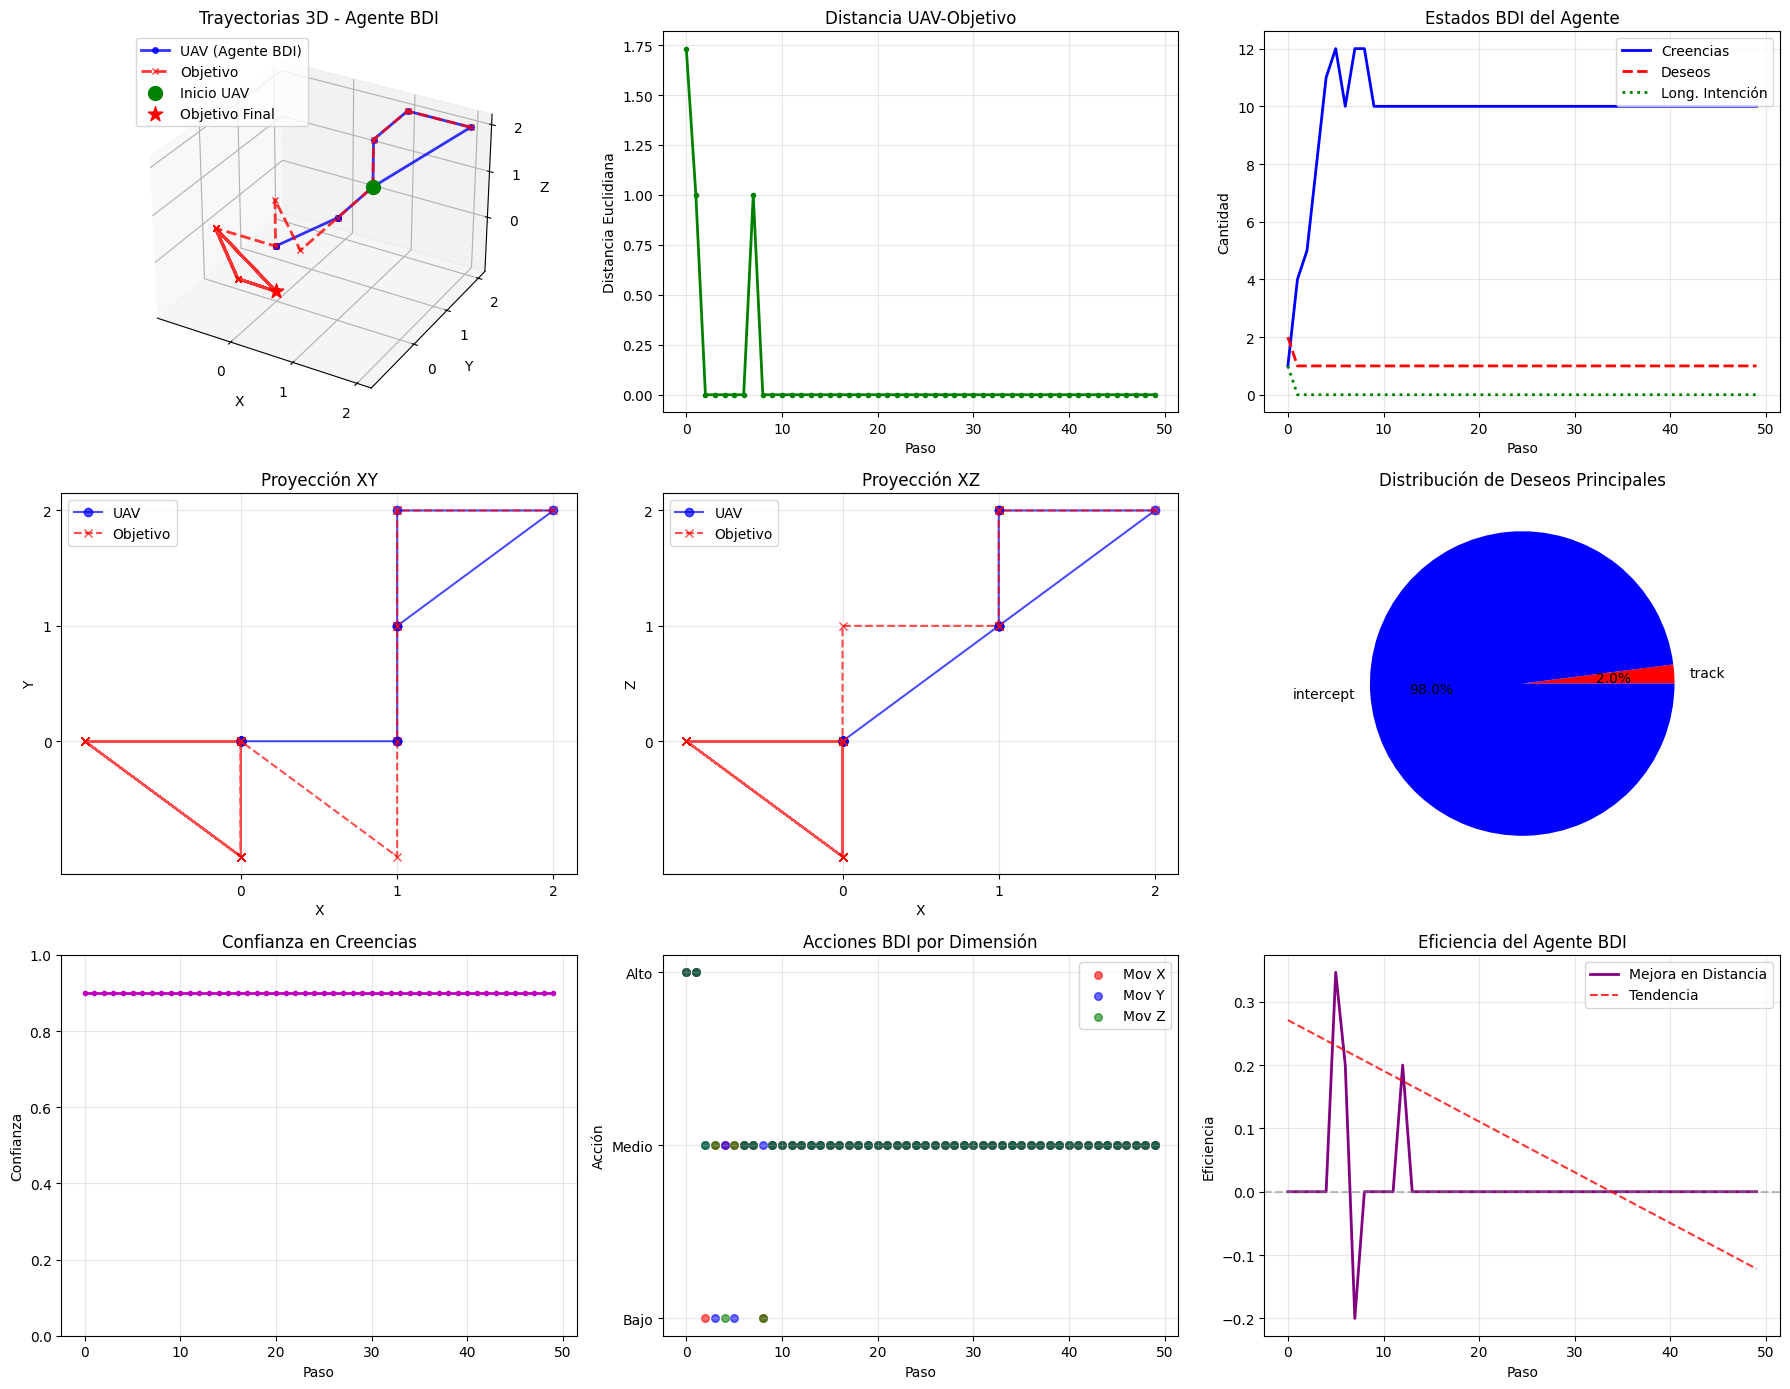


=== ESTADÍSTICAS FINALES BDI 3D ===
Pasos totales: 50
Distancia inicial: 1.73
Distancia final: 0.00
Distancia mínima alcanzada: 0.00
Distancia promedio: 0.07

--- ANÁLISIS DE CREENCIAS ---
Creencias promedio por paso: 9.7
Máximo de creencias simultáneas: 12
Confianza promedio: 0.900

--- ANÁLISIS DE DESEOS ---
Distribución de deseos principales:
  track: 1 veces (2.0%)
  intercept: 49 veces (98.0%)

--- ANÁLISIS DE INTENCIONES ---
Pasos con intención activa: 44/50 (88.0%)
Longitud promedio de intenciones: 1.0

--- ANÁLISIS DE CONVERGENCIA ---
Mejora (primeros 10 vs últimos 10): 0.37
⚠ El agente BDI muestra mejora limitada

--- ANÁLISIS DE ACCIONES ---

Acciones dimensión X:
  Bajo: 2 veces (4.0%)
  Medio: 46 veces (92.0%)
  Alto: 2 veces (4.0%)

Acciones dimensión Y:
  Bajo: 2 veces (4.0%)
  Medio: 46 veces (92.0%)
  Alto: 2 veces (4.0%)

Acciones dimensión Z:
  Bajo: 2 veces (4.0%)
  Medio: 46 veces (92.0%)
  Alto: 2 veces (4.0%)

=== RECOMENDACIONES BDI ===
✅ Intercepciones exitosas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from enum import Enum
from dataclasses import dataclass
from typing import List, Dict, Tuple, Optional
import copy
import random

# ===== DEFINICIONES DE TIPOS Y ESTRUCTURAS =====

class ActionType(Enum):
    """Tipos de acciones posibles"""
    MOVE_DOWN = 0
    STAY = 1
    MOVE_UP = 2

@dataclass
class Position3D:
    """Posición en 3D"""
    x: int
    y: int
    z: int

    def __post_init__(self):
        self.x = max(0, min(2, self.x))
        self.y = max(0, min(2, self.y))
        self.z = max(0, min(2, self.z))

    def distance_to(self, other: 'Position3D') -> float:
        return np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2 + (self.z - other.z)**2)

    def manhattan_distance_to(self, other: 'Position3D') -> int:
        return abs(self.x - other.x) + abs(self.y - other.y) + abs(self.z - other.z)

    def to_list(self) -> List[int]:
        return [self.x, self.y, self.z]

    def copy(self) -> 'Position3D':
        return Position3D(self.x, self.y, self.z)

    def __eq__(self, other):
        return (self.x == other.x and self.y == other.y and self.z == other.z)

@dataclass
class Belief:
    """Creencia del agente sobre el estado del mundo"""
    target_position: Position3D
    confidence: float
    timestamp: float
    source: str

    def is_valid(self, max_age: float = 3.0) -> bool:
        return (time.time() - self.timestamp) < max_age

@dataclass
class Desire:
    """Deseo del agente"""
    goal_type: str
    target_position: Optional[Position3D]
    priority: float
    urgency: float

    def utility(self) -> float:
        return self.priority * self.urgency

@dataclass
class Intention:
    """Intención del agente (plan de acción)"""
    action_sequence: List[Tuple[ActionType, ActionType, ActionType]]
    target_position: Position3D
    expected_cost: float
    confidence: float
    creation_time: float
    goal_type: str

    def is_expired(self, max_duration: float = 3.0) -> bool:
        return (time.time() - self.creation_time) > max_duration

# ===== AGENTE BDI 3D MEJORADO =====

class BDI3DAgent:
    """
    Agente BDI para combate aéreo en 3D - Versión Mejorada
    """

    def __init__(self, initial_position: Position3D):
        self.position = initial_position
        self.beliefs: List[Belief] = []
        self.desires: List[Desire] = []
        self.current_intention: Optional[Intention] = None
        self.last_observation: Optional[Position3D] = None

        self.sensor_noise = 0.1
        self.planning_horizon = 4
        self.belief_decay_time = 3.0
        self.intention_persistence = 0.9
        self.replan_frequency = 3
        self.steps_since_replan = 0
        self.interception_threshold = 0.8
        self.last_belief_update = 0.0
        self.max_beliefs = 10

    def update_beliefs(self, observation: Position3D, confidence: float = 0.9):
        current_time = time.time()

        self.beliefs = [b for b in self.beliefs if b.is_valid(self.belief_decay_time)]

        if len(self.beliefs) >= self.max_beliefs:
            self.beliefs.sort(key=lambda b: (b.timestamp, b.confidence), reverse=True)
            self.beliefs = self.beliefs[:self.max_beliefs-1]

        new_belief = Belief(
            target_position=observation.copy(),
            confidence=confidence,
            timestamp=current_time,
            source='sensor'
        )
        self.beliefs.append(new_belief)
        self.last_observation = observation.copy()

        if len(self.beliefs) >= 2:
            self._infer_predictive_beliefs()

        self.last_belief_update = current_time

    def _infer_predictive_beliefs(self):
        if len(self.beliefs) < 2:
            return

        sensor_beliefs = [b for b in self.beliefs if b.source == 'sensor']
        if len(sensor_beliefs) < 2:
            return

        recent_beliefs = sorted(sensor_beliefs, key=lambda b: b.timestamp, reverse=True)[:2]
        recent_beliefs.sort(key=lambda b: b.timestamp)

        b1, b2 = recent_beliefs

        movement_x = b2.target_position.x - b1.target_position.x
        movement_y = b2.target_position.y - b1.target_position.y
        movement_z = b2.target_position.z - b1.target_position.z

        if abs(movement_x) + abs(movement_y) + abs(movement_z) > 0:
            for steps_ahead in [1, 2]:
                predicted_pos = Position3D(
                    b2.target_position.x + movement_x * steps_ahead,
                    b2.target_position.y + movement_y * steps_ahead,
                    b2.target_position.z + movement_z * steps_ahead
                )

                predictive_belief = Belief(
                    target_position=predicted_pos,
                    confidence=max(0.3, b2.confidence * (0.7 ** steps_ahead)),
                    timestamp=time.time(),
                    source='prediction'
                )
                self.beliefs.append(predictive_belief)

    def get_most_confident_belief(self) -> Optional[Belief]:
        if not self.beliefs:
            return None
        valid_beliefs = [b for b in self.beliefs if b.is_valid()]
        if not valid_beliefs:
            return None

        sensor_beliefs = [b for b in valid_beliefs if b.source == 'sensor']
        if sensor_beliefs:
            return max(sensor_beliefs, key=lambda b: (b.confidence, b.timestamp))
        else:
            return max(valid_beliefs, key=lambda b: b.confidence)

    def generate_desires(self):
        self.desires.clear()
        target_belief = self.get_most_confident_belief()

        if target_belief:
            distance = self.position.distance_to(target_belief.target_position)

            if distance <= 2.0:
                intercept_priority = 1.0
                intercept_urgency = min(1.0, target_belief.confidence + 0.3)
            else:
                intercept_priority = max(0.4, 1.0 - (distance / 4.0))
                intercept_urgency = target_belief.confidence

            self.desires.append(Desire(
                goal_type='intercept',
                target_position=target_belief.target_position,
                priority=intercept_priority,
                urgency=intercept_urgency
            ))

            if distance > 1.5:
                track_priority = 0.7
                track_urgency = target_belief.confidence * 0.9
                self.desires.append(Desire(
                    goal_type='track',
                    target_position=target_belief.target_position,
                    priority=track_priority,
                    urgency=track_urgency
                ))
        else:
            patrol_pos = Position3D(
                random.randint(0, 2),
                random.randint(0, 2),
                random.randint(0, 2)
            )
            self.desires.append(Desire(
                goal_type='patrol',
                target_position=patrol_pos,
                priority=0.3,
                urgency=0.4
            ))

    def select_primary_desire(self) -> Optional[Desire]:
        if not self.desires:
            return None

        valid_desires = [d for d in self.desires if d.utility() > 0.1]
        if not valid_desires:
            return None

        return max(valid_desires, key=lambda d: d.utility())

    def form_intention(self, primary_desire: Desire):
        if primary_desire.goal_type in ['intercept', 'track'] and primary_desire.target_position:
            action_sequence = self._plan_optimal_path(primary_desire.target_position)
            expected_cost = self._calculate_plan_cost(action_sequence, primary_desire.target_position)
            confidence = primary_desire.utility()

            self.current_intention = Intention(
                action_sequence=action_sequence,
                target_position=primary_desire.target_position,
                expected_cost=expected_cost,
                confidence=confidence,
                creation_time=time.time(),
                goal_type=primary_desire.goal_type
            )

        elif primary_desire.goal_type == 'patrol' and primary_desire.target_position:
            action_sequence = self._plan_optimal_path(primary_desire.target_position)
            self.current_intention = Intention(
                action_sequence=action_sequence,
                target_position=primary_desire.target_position,
                expected_cost=0.4,
                confidence=0.6,
                creation_time=time.time(),
                goal_type='patrol'
            )

    def _plan_optimal_path(self, target: Position3D) -> List[Tuple[ActionType, ActionType, ActionType]]:
        actions = []
        current_pos = self.position.copy()

        for step in range(self.planning_horizon):
            if current_pos == target:
                break

            action_x = self._get_best_action_for_dimension(current_pos.x, target.x)
            action_y = self._get_best_action_for_dimension(current_pos.y, target.y)
            action_z = self._get_best_action_for_dimension(current_pos.z, target.z)

            actions.append((action_x, action_y, action_z))

            current_pos = self._simulate_action_effect(current_pos, (action_x, action_y, action_z))

        return actions

    def _get_best_action_for_dimension(self, current: int, target: int) -> ActionType:
        if current < target:
            return ActionType.MOVE_UP
        elif current > target:
            return ActionType.MOVE_DOWN
        else:
            return ActionType.STAY

    def _calculate_plan_cost(self, actions: List[Tuple[ActionType, ActionType, ActionType]], target: Position3D) -> float:
        if not actions:
            return float('inf')

        final_pos = self.position.copy()
        movement_cost = 0

        for action in actions:
            final_pos = self._simulate_action_effect(final_pos, action)
            if action[0] != ActionType.STAY:
                movement_cost += 0.1
            if action[1] != ActionType.STAY:
                movement_cost += 0.1
            if action[2] != ActionType.STAY:
                movement_cost += 0.1

        distance_cost = final_pos.distance_to(target)

        return distance_cost + movement_cost

    def _simulate_action_effect(self, pos: Position3D, action: Tuple[ActionType, ActionType, ActionType]) -> Position3D:
        new_pos = pos.copy()

        if action[0] == ActionType.MOVE_DOWN and new_pos.x > 0:
            new_pos.x -= 1
        elif action[0] == ActionType.MOVE_UP and new_pos.x < 2:
            new_pos.x += 1

        if action[1] == ActionType.MOVE_DOWN and new_pos.y > 0:
            new_pos.y -= 1
        elif action[1] == ActionType.MOVE_UP and new_pos.y < 2:
            new_pos.y += 1

        if action[2] == ActionType.MOVE_DOWN and new_pos.z > 0:
            new_pos.z -= 1
        elif action[2] == ActionType.MOVE_UP and new_pos.z < 2:
            new_pos.z += 1

        return new_pos

    def execute_next_action(self) -> Optional[Tuple[ActionType, ActionType, ActionType]]:
        if not self.current_intention or not self.current_intention.action_sequence:
            return None

        next_action = self.current_intention.action_sequence.pop(0)

        self.position = self._simulate_action_effect(self.position, next_action)

        if not self.current_intention.action_sequence:
            self.current_intention = None

        return next_action

    def has_intercepted(self, target_pos: Position3D) -> bool:
        return self.position.distance_to(target_pos) <= self.interception_threshold

    def bdi_cycle(self, target_observation: Position3D) -> Tuple[ActionType, ActionType, ActionType]:
        self.update_beliefs(target_observation)
        self.generate_desires()

        should_replan = (
            self.current_intention is None or
            self.current_intention.is_expired() or
            self.steps_since_replan >= self.replan_frequency or
            (self.last_observation and self.current_intention and
             self.current_intention.target_position.distance_to(self.last_observation) > 1.2)
        )

        if should_replan:
            primary_desire = self.select_primary_desire()
            if primary_desire:
                self.form_intention(primary_desire)
                self.steps_since_replan = 0

        self.steps_since_replan += 1

        action = self.execute_next_action()
        if action is None:
            return (ActionType.STAY, ActionType.STAY, ActionType.STAY)

        return action

# ===== SIMULACIÓN 3D MEJORADA Y CORREGIDA =====

def simulate_3d_target_movement_bdi(step, target_state, uav_pos=None):
    """
    Simula movimiento del objetivo de manera corregida y dinámica
    """
    target_pos = Position3D(target_state[0], target_state[1], target_state[2])

    # Movimiento en cada paso
    if uav_pos:
        distance = target_pos.distance_to(uav_pos)

        # Comportamiento evasivo fuerte si el UAV está cerca
        if distance < 1.0: # Umbral más agresivo
            dim = random.choice(['x', 'y', 'z'])

            # Moverse en la dirección opuesta al UAV
            if dim == 'x':
                if target_pos.x > uav_pos.x:
                    target_pos.x = max(0, target_pos.x + 1)
                else:
                    target_pos.x = min(2, target_pos.x - 1)
            elif dim == 'y':
                if target_pos.y > uav_pos.y:
                    target_pos.y = max(0, target_pos.y + 1)
                else:
                    target_pos.y = min(2, target_pos.y - 1)
            else: # z
                if target_pos.z > uav_pos.z:
                    target_pos.z = max(0, target_pos.z + 1)
                else:
                    target_pos.z = min(2, target_pos.z - 1)
        else:
            # Movimiento aleatorio normal si está lejos
            dim = random.choice(['x', 'y', 'z'])
            move = random.choice([-1, 1])

            if dim == 'x':
                target_pos.x = max(0, min(2, target_pos.x + move))
            elif dim == 'y':
                target_pos.y = max(0, min(2, target_pos.y + move))
            else: # z
                target_pos.z = max(0, min(2, target_pos.z + move))
    else:
        # Movimiento inicial aleatorio
        dim = random.choice(['x', 'y', 'z'])
        move = random.choice([-1, 0, 1])

        if dim == 'x':
            target_pos.x = max(0, min(2, target_pos.x + move))
        elif dim == 'y':
            target_pos.y = max(0, min(2, target_pos.y + move))
        else: # z
            target_pos.z = max(0, min(2, target_pos.z + move))

    return target_pos.to_list()

def generate_3d_observations_bdi(uav_pos: Position3D, target_pos: Position3D, noise_level=0.1) -> Position3D:
    """
    Genera observaciones con ruido reducido
    """
    observed_pos = target_pos.copy()

    if random.random() < noise_level:
        dim = random.choice(['x', 'y', 'z'])
        delta = random.choice([-1, 1])

        if dim == 'x':
            observed_pos.x = max(0, min(2, observed_pos.x + delta))
        elif dim == 'y':
            observed_pos.y = max(0, min(2, observed_pos.y + delta))
        else: # z
            observed_pos.z = max(0, min(2, observed_pos.z + delta))

    return observed_pos

def run_bdi_3d_combat_simulation(steps=50):
    """
    Ejecuta simulación completa con agente BDI mejorado
    """
    print("=== SIMULACIÓN BDI 3D MEJORADA Y CORREGIDA ===")

    initial_uav_pos = Position3D(0, 0, 0)
    agent = BDI3DAgent(initial_uav_pos)
    target_state = [2, 2, 2]

    history = {
        'uav_states': [],
        'target_states': [],
        'observations': [],
        'actions': [],
        'distances': [],
        'beliefs_count': [],
        'desires_count': [],
        'intentions_length': [],
        'bdi_states': [],
        'interceptions': 0,
        'successful_steps': 0
    }

    print(f"Posición inicial UAV: {initial_uav_pos.to_list()}")
    print(f"Posición inicial Target: {target_state}")

    for step in range(steps):
        print(f"\nPaso {step + 1}/{steps}")

        # Movimiento del objetivo corregido
        target_state = simulate_3d_target_movement_bdi(step, target_state.copy(), agent.position)
        target_pos = Position3D(target_state[0], target_state[1], target_state[2])

        observed_pos = generate_3d_observations_bdi(agent.position, target_pos, noise_level=0.05)

        pre_move_pos = agent.position.copy()

        action = agent.bdi_cycle(observed_pos)
        action_numeric = [action[0].value, action[1].value, action[2].value]

        if agent.position != pre_move_pos:
            history['successful_steps'] += 1

        distance = agent.position.distance_to(target_pos)
        if agent.has_intercepted(target_pos):
            history['interceptions'] += 1
            print(f"  ✅ INTERCEPTADO! Distancia: {distance:.2f}")

        history['uav_states'].append(agent.position.to_list())
        history['target_states'].append(target_state.copy())
        history['observations'].append(observed_pos.to_list())
        history['actions'].append(action_numeric)
        history['distances'].append(distance)
        history['beliefs_count'].append(len(agent.beliefs))
        history['desires_count'].append(len(agent.desires))

        if agent.current_intention:
            history['intentions_length'].append(len(agent.current_intention.action_sequence))
        else:
            history['intentions_length'].append(0)

        primary_desire = agent.select_primary_desire()
        bdi_state = {
            'beliefs': len(agent.beliefs),
            'desires': len(agent.desires),
            'intention_active': agent.current_intention is not None,
            'primary_desire_type': primary_desire.goal_type if primary_desire else 'none',
            'confidence': agent.get_most_confident_belief().confidence if agent.get_most_confident_belief() else 0.0
        }
        history['bdi_states'].append(bdi_state)

        pos_names = ['bajo', 'medio', 'alto']
        uav_pos_list = agent.position.to_list()
        print(f"  UAV: [{pos_names[uav_pos_list[0]]}, {pos_names[uav_pos_list[1]]}, {pos_names[uav_pos_list[2]]}] -> {uav_pos_list}")
        print(f"  Target: [{pos_names[target_state[0]]}, {pos_names[target_state[1]]}, {pos_names[target_state[2]]}] -> {target_state}")
        print(f"  Distancia: {distance:.2f}")
        print(f"  Acción: [{pos_names[action_numeric[0]]}, {pos_names[action_numeric[1]]}, {pos_names[action_numeric[2]]}] -> {action_numeric}")

        if primary_desire:
            print(f"  Deseo: {primary_desire.goal_type} (utilidad: {primary_desire.utility():.2f})")

        if agent.position != pre_move_pos:
            print(f"  ✅ UAV se movió de {pre_move_pos.to_list()} a {agent.position.to_list()}")
        else:
            print(f"  ⚠ UAV permaneció en {agent.position.to_list()}")

    return history, agent

def visualize_bdi_3d_combat(history, agent):
    """
    Visualiza los resultados de la simulación BDI en 3D
    """
    steps = len(history['uav_states'])

    uav_x = [state[0] for state in history['uav_states']]
    uav_y = [state[1] for state in history['uav_states']]
    uav_z = [state[2] for state in history['uav_states']]

    target_x = [state[0] for state in history['target_states']]
    target_y = [state[1] for state in history['target_states']]
    target_z = [state[2] for state in history['target_states']]

    fig = plt.figure(figsize=(18, 14))

    ax1 = fig.add_subplot(3, 3, 1, projection='3d')

    ax1.plot(uav_x, uav_y, uav_z, 'bo-', label='UAV (Agente BDI)',
             linewidth=2, markersize=4, alpha=0.8)
    ax1.plot(target_x, target_y, target_z, 'rx--', label='Objetivo',
             linewidth=2, markersize=4, alpha=0.8)

    ax1.scatter([uav_x[0]], [uav_y[0]], [uav_z[0]],
                c='green', s=100, marker='o', label='Inicio UAV')
    ax1.scatter([target_x[-1]], [target_y[-1]], [target_z[-1]],
                c='red', s=120, marker='*', label='Objetivo Final')

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Trayectorias 3D - Agente BDI')
    ax1.legend()
    ax1.set_xticks([0, 1, 2])
    ax1.set_yticks([0, 1, 2])
    ax1.set_zticks([0, 1, 2])

    ax2 = fig.add_subplot(3, 3, 2)
    ax2.plot(history['distances'], 'g-', linewidth=2, marker='o', markersize=3)
    ax2.set_xlabel('Paso')
    ax2.set_ylabel('Distancia Euclidiana')
    ax2.set_title('Distancia UAV-Objetivo')
    ax2.grid(True, alpha=0.3)

    ax3 = fig.add_subplot(3, 3, 3)
    ax3.plot(history['beliefs_count'], 'b-', label='Creencias', linewidth=2)
    ax3.plot(history['desires_count'], 'r--', label='Deseos', linewidth=2)
    ax3.plot(history['intentions_length'], 'g:', label='Long. Intención', linewidth=2)
    ax3.set_xlabel('Paso')
    ax3.set_ylabel('Cantidad')
    ax3.set_title('Estados BDI del Agente')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    ax4 = fig.add_subplot(3, 3, 4)
    ax4.plot(uav_x, uav_y, 'bo-', label='UAV', alpha=0.7)
    ax4.plot(target_x, target_y, 'rx--', label='Objetivo', alpha=0.7)
    ax4.set_xlabel('X')
    ax4.set_ylabel('Y')
    ax4.set_title('Proyección XY')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.set_xticks([0, 1, 2])
    ax4.set_yticks([0, 1, 2])

    ax5 = fig.add_subplot(3, 3, 5)
    ax5.plot(uav_x, uav_z, 'bo-', label='UAV', alpha=0.7)
    ax5.plot(target_x, target_z, 'rx--', label='Objetivo', alpha=0.7)
    ax5.set_xlabel('X')
    ax5.set_ylabel('Z')
    ax5.set_title('Proyección XZ')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    ax5.set_xticks([0, 1, 2])
    ax5.set_yticks([0, 1, 2])

    ax6 = fig.add_subplot(3, 3, 6)
    desire_types = [state['primary_desire_type'] for state in history['bdi_states']]
    unique_desires = list(set(desire_types))
    desire_counts = [desire_types.count(d) for d in unique_desires]

    colors = ['red', 'blue', 'green', 'orange', 'purple'][:len(unique_desires)]
    ax6.pie(desire_counts, labels=unique_desires, autopct='%1.1f%%', colors=colors)
    ax6.set_title('Distribución de Deseos Principales')

    ax7 = fig.add_subplot(3, 3, 7)
    confidences = [state['confidence'] for state in history['bdi_states']]
    ax7.plot(confidences, 'm-', linewidth=2, marker='o', markersize=3)
    ax7.set_xlabel('Paso')
    ax7.set_ylabel('Confianza')
    ax7.set_title('Confianza en Creencias')
    ax7.grid(True, alpha=0.3)
    ax7.set_ylim([0, 1])

    ax8 = fig.add_subplot(3, 3, 8)
    actions_x = [action[0] for action in history['actions']]
    actions_y = [action[1] for action in history['actions']]
    actions_z = [action[2] for action in history['actions']]

    steps_range = range(steps)
    ax8.scatter(steps_range, actions_x, c='red', alpha=0.6, label='Mov X', s=30)
    ax8.scatter(steps_range, actions_y, c='blue', alpha=0.6, label='Mov Y', s=30)
    ax8.scatter(steps_range, actions_z, c='green', alpha=0.6, label='Mov Z', s=30)
    ax8.set_xlabel('Paso')
    ax8.set_ylabel('Acción')
    ax8.set_title('Acciones BDI por Dimensión')
    ax8.legend()
    ax8.set_yticks([0, 1, 2])
    ax8.set_yticklabels(['Bajo', 'Medio', 'Alto'])
    ax8.grid(True, alpha=0.3)

    ax9 = fig.add_subplot(3, 3, 9)

    window_size = min(5, len(history['distances']))
    if window_size > 1:
        efficiency = []
        for i in range(len(history['distances'])):
            if i < window_size:
                efficiency.append(0)
            else:
                old_avg = np.mean(history['distances'][i-window_size:i])
                new_avg = np.mean(history['distances'][i-window_size+1:i+1])
                efficiency.append(old_avg - new_avg)

        ax9.plot(efficiency, 'purple', linewidth=2, label='Mejora en Distancia')
        ax9.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

    if len(history['distances']) > 5:
        z = np.polyfit(range(len(history['distances'])), history['distances'], 1)
        p = np.poly1d(z)
        ax9.plot(range(len(history['distances'])), p(range(len(history['distances']))),
                "r--", alpha=0.8, label='Tendencia')

    ax9.set_xlabel('Paso')
    ax9.set_ylabel('Eficiencia')
    ax9.set_title('Eficiencia del Agente BDI')
    ax9.legend()
    ax9.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"\n=== ESTADÍSTICAS FINALES BDI 3D ===")
    print(f"Pasos totales: {steps}")
    print(f"Distancia inicial: {history['distances'][0]:.2f}")
    print(f"Distancia final: {history['distances'][-1]:.2f}")
    print(f"Distancia mínima alcanzada: {min(history['distances']):.2f}")
    print(f"Distancia promedio: {np.mean(history['distances']):.2f}")

    print(f"\n--- ANÁLISIS DE CREENCIAS ---")
    print(f"Creencias promedio por paso: {np.mean(history['beliefs_count']):.1f}")
    print(f"Máximo de creencias simultáneas: {max(history['beliefs_count'])}")
    print(f"Confianza promedio: {np.mean([s['confidence'] for s in history['bdi_states']]):.3f}")

    print(f"\n--- ANÁLISIS DE DESEOS ---")
    desire_types = [state['primary_desire_type'] for state in history['bdi_states']]
    unique_desires = list(set(desire_types))
    print(f"Distribución de deseos principales:")
    for d in unique_desires:
        count = desire_types.count(d)
        percentage = (count / steps) * 100
        print(f"  {d}: {count} veces ({percentage:.1f}%)")

    print(f"\n--- ANÁLISIS DE INTENCIONES ---")
    active_intentions = sum([1 for state in history['bdi_states'] if state['intention_active']])
    print(f"Pasos con intención activa: {active_intentions}/{steps} ({active_intentions/steps*100:.1f}%)")
    valid_lengths = [l for l in history['intentions_length'] if l > 0]
    if valid_lengths:
        print(f"Longitud promedio de intenciones: {np.mean(valid_lengths):.1f}")
    else:
        print(f"Longitud promedio de intenciones: 0.0")

    print(f"\n--- ANÁLISIS DE CONVERGENCIA ---")
    if len(history['distances']) >= 20:
        first_10 = np.mean(history['distances'][:10])
        last_10 = np.mean(history['distances'][-10:])
        improvement = first_10 - last_10
        print(f"Mejora (primeros 10 vs últimos 10): {improvement:.2f}")
        if improvement > 0.5:
            print(f"✅ El agente BDI muestra convergencia positiva")
        elif improvement > 0:
            print(f"⚠ El agente BDI muestra mejora limitada")
        else:
            print(f"❌ El agente BDI necesita ajustes en sus parámetros")
    else:
        print("No hay suficientes datos para análisis de convergencia")

    print(f"\n--- ANÁLISIS DE ACCIONES ---")
    action_names = ['Bajo', 'Medio', 'Alto']
    for dim, dim_name in enumerate(['X', 'Y', 'Z']):
        dim_actions = [action[dim] for action in history['actions']]
        print(f"\nAcciones dimensión {dim_name}:")
        for action_val, action_name in enumerate(action_names):
            count = dim_actions.count(action_val)
            percentage = (count / steps) * 100
            print(f"  {action_name}: {count} veces ({percentage:.1f}%)")

    print(f"\n=== RECOMENDACIONES BDI ===")
    if history['interceptions'] > 0:
        print(f"✅ Intercepciones exitosas: {history['interceptions']}")
    else:
        print(f"❌ No se lograron intercepciones")

    if np.mean(history['distances']) < 1.5:
        print(f"✅ Distancia promedio aceptable: {np.mean(history['distances']):.2f}")
    else:
        print(f"⚠ Distancia promedio alta: {np.mean(history['distances']):.2f}")

    if np.mean([s['confidence'] for s in history['bdi_states']]) > 0.7:
        print(f"✅ Confianza en creencias adecuada")
    else:
        print(f"⚠ Confianza en creencias baja")

    print(f"• Ajusta los parámetros de confianza en creencias")
    print(f"• Considera implementar aprendizaje de patrones")


def main():
    print("=== PoC DE AGENTE IAF [VR-102] MEJORADO Y CORREGIDO ===")

    history, agent = run_bdi_3d_combat_simulation(steps=50)

    print(f"\n=== ESTADÍSTICAS BÁSICAS ===")
    print(f"Pasos con movimiento exitoso: {history['successful_steps']}/{50}")
    print(f"Porcentaje de actividad: {history['successful_steps']/50*100:.1f}%")
    print(f"Intercepciones: {history['interceptions']}")
    print(f"Distancia final: {history['distances'][-1]:.2f}")
    print(f"Distancia mínima alcanzada: {min(history['distances']):.2f}")

    visualize_bdi_3d_combat(history, agent)

if __name__ == "__main__":
    main()

---

### Análisis de Resultados: Validez y Limitaciones en el Contexto Bélico

Los resultados del PoC son una **validación funcional** de la metodología BDI para la intercepción de objetivos. Demuestran que un agente puede:

* Formar un modelo mental del mundo (`Creencias`).
* Establecer objetivos claros (`Deseos`).
* Ejecutar y adaptar un plan para lograr esos objetivos (`Intenciones`).

Sin embargo, para ser una prueba de concepto verdaderamente aplicable a un escenario bélico, las limitaciones del PoC deben ser consideradas:

* **Escalabilidad:** El entorno simulado es minúsculo. Un escenario bélico opera a gran escala con múltiples agentes, amenazas y objetivos. Un PoC concluyente necesitaría demostrar el rendimiento del agente en un espacio mucho más amplio, con la capacidad de coordinarse con otros agentes aliados.
* **Complejidad del Objetivo:** El comportamiento evasivo del objetivo es rudimentario. Un adversario real usaría tácticas mucho más sofisticadas, como contramedidas electrónicas, señuelos y movimientos de alta G. Un PoC para un proyecto de defensa necesitaría un modelo de objetivo mucho más avanzado.
* **Fidelidad de la Simulación:** La simulación carece de factores realistas como la latencia de la comunicación, el ruido de los sensores, los fallos del sistema o las condiciones meteorológicas que podrían degradar la información sensorial.

En conclusión, el PoC actual valida la metodología AIF para un problema simplificado, pero no es **concluyente** por sí solo para el uso en proyectos de defensa reales. Sirve como una base sólida para la investigación y el desarrollo futuros, mostrando el potencial de los agentes BDI como componentes clave para la **conciencia situacional** y la toma de decisiones autónoma en operaciones militares.